# <center> Travel Insurance Prediction
<center> by Vicky Tanamal

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
data = 'TravelInsurancePrediction.csv'
df = pd.read_csv(data, index_col=0)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


# Exploring Data

In [3]:
df.shape

(1987, 9)

In [4]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


In [7]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [10]:
df['ChronicDiseases'] = df['ChronicDiseases'].map({0: "No", 1: "Yes"})
df['TravelInsurance'] = df['TravelInsurance'].map({0: "Not purchased", 1: "Purchased"})

In [11]:
df.select_dtypes(include='object').nunique()

Employment Type        2
GraduateOrNot          2
ChronicDiseases        2
FrequentFlyer          2
EverTravelledAbroad    2
TravelInsurance        2
dtype: int64

In [12]:
df.select_dtypes(exclude='object').nunique()

Age              11
AnnualIncome     30
FamilyMembers     8
dtype: int64

# Define Target Variable / Labelling

Target Variable for this case is TravelInsurance, because we want to know whether customers purchase the TravelInsurance or not. 

In [91]:
df['TravelInsurance'].value_counts(normalize = True) * 100

Not purchased    64.26774
Purchased        35.73226
Name: TravelInsurance, dtype: float64

We can see most of customers do not purchase TravelInsurance 

# Data Cleaning and Processing

We already checked the data before and there is no missing data

# Exploratory Data Analysis

In [92]:
cats = []
nums = []
for i in df.columns:
    if df[i].dtype == 'object':
        cats.append(i)
    else:
        nums.append(i)
print('cats =', cats)
print('nums =', nums)

cats = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
nums = ['Age', 'AnnualIncome', 'FamilyMembers']


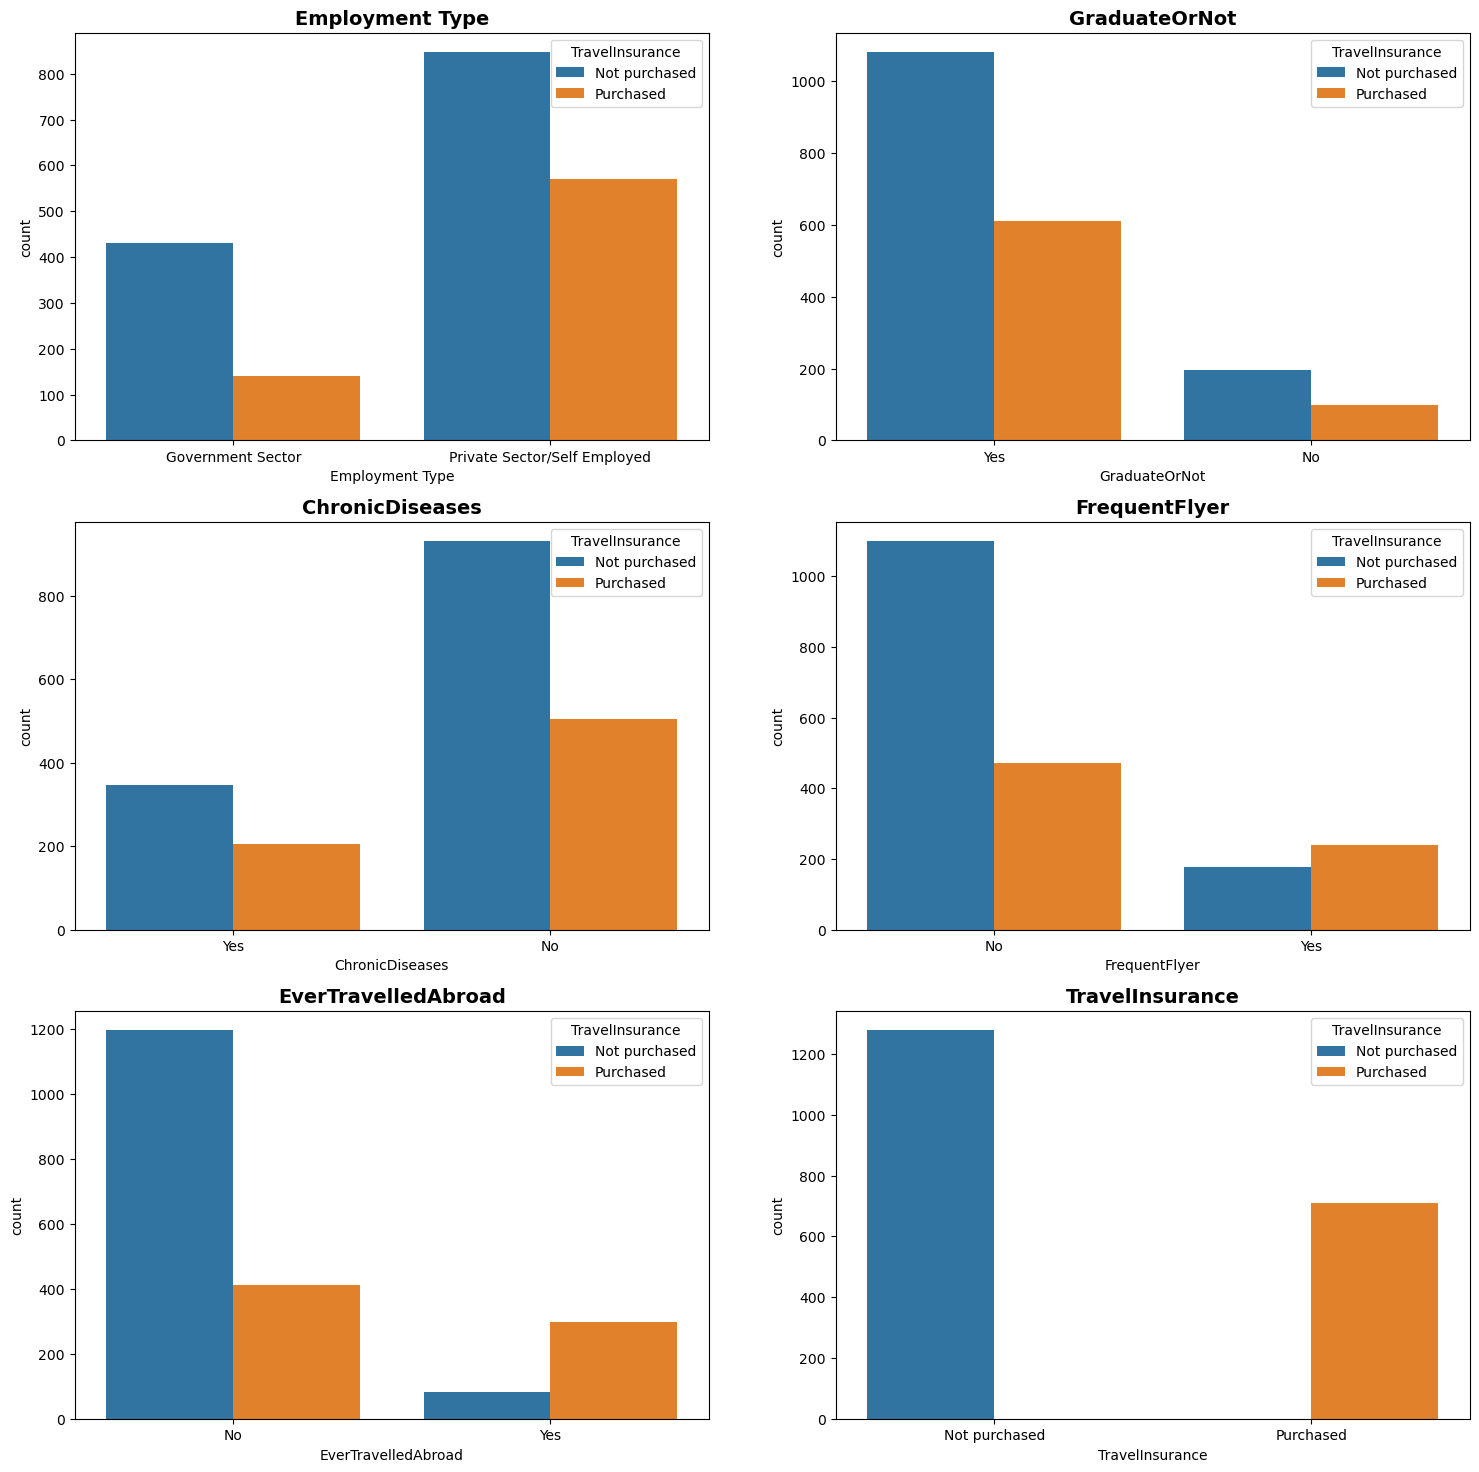

In [93]:
# Categorical
plt.figure(figsize=(18,18))
for i in range(0, len(cats)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cats[i]], hue = df['TravelInsurance'])
    # Set plot title
    plt.title(cats[i], weight='bold', fontsize = 14)

- Most of customers employment type are in the Private Sector/Self Employed
- Most of customers graduate from college and most of them not purchased the TravelInsurance
- Most of customers who don't have ChronicDiseases and most of them not purchased the TravelInsurance
- Most of customers who don't FrequentFlyer and most of them not purchased the TravelInsurance. Meanwhile, Most Customers who have FrequentFyler purchased TravelInsurance  
- Most of customers who don't Ever Travelled Abroad and most of them not purchased the TravelInsurance. Meanwhile, Customers who Ever Travelled Abroad purchased the TravelInsurance

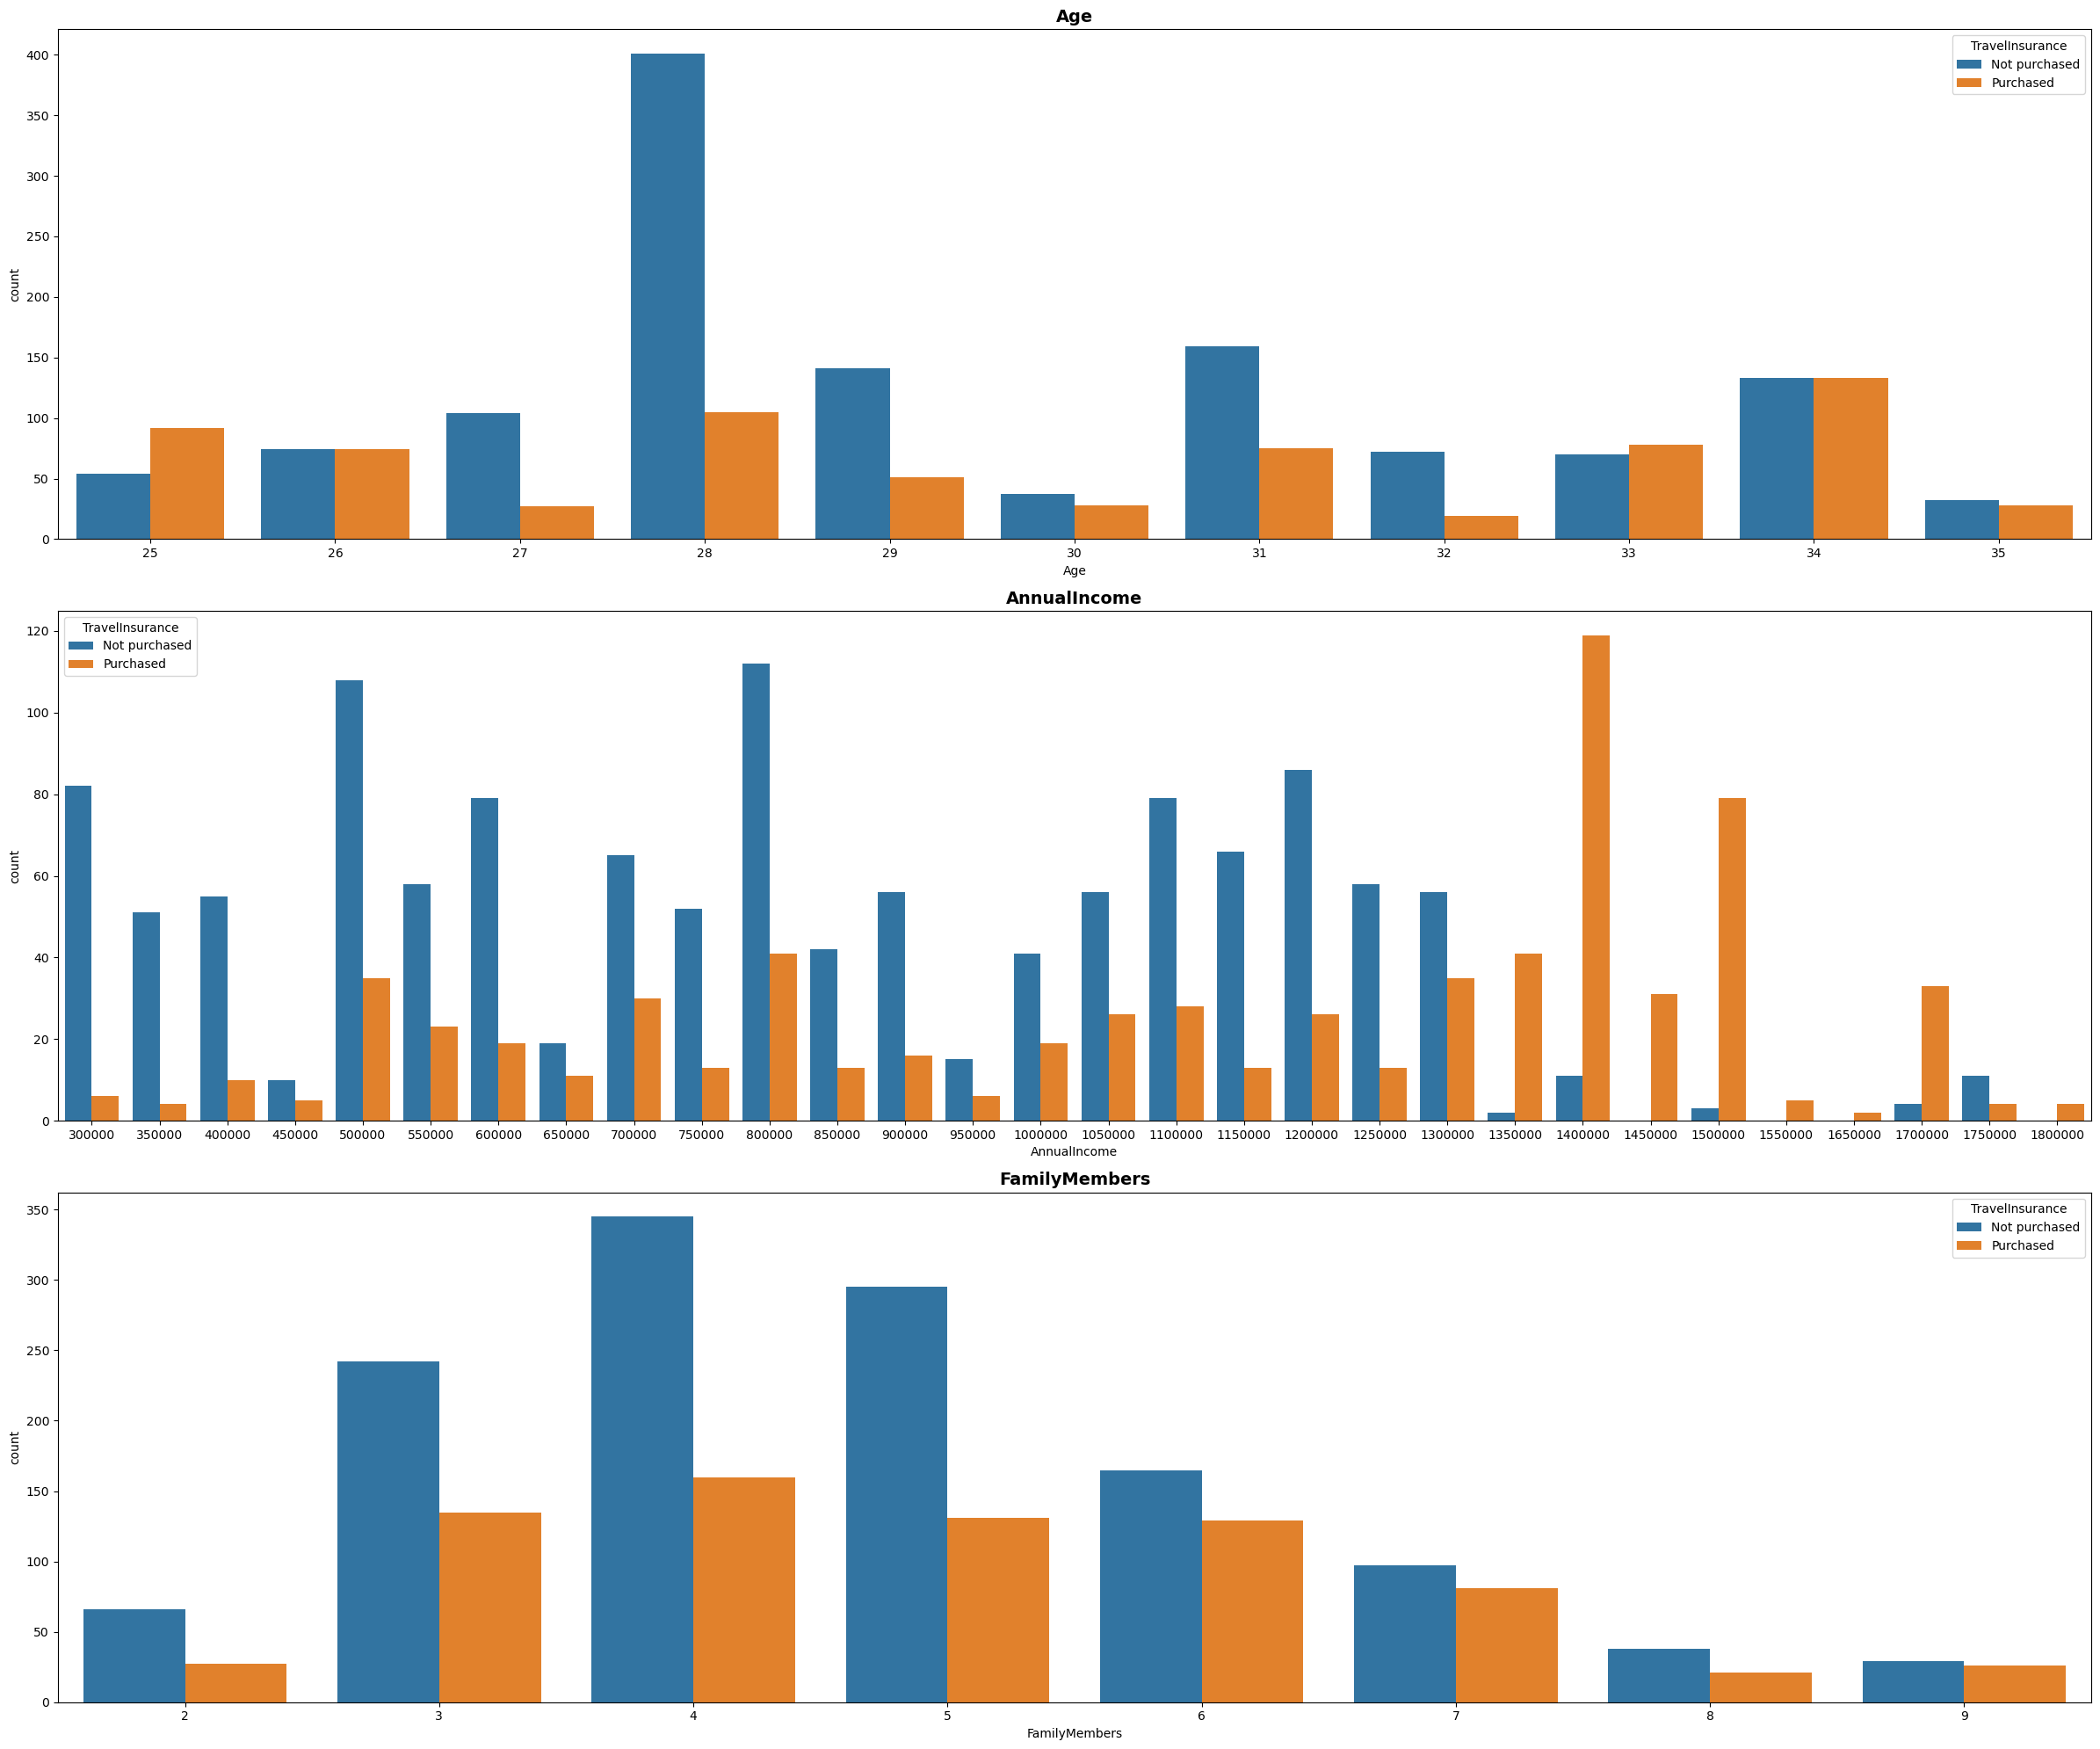

In [124]:
# Numerical
plt.figure(figsize=(24,20))
for i in range(0, len(nums)):
    plt.subplot(3,1,i+1)
    sns.countplot(data=df, x=df[nums[i]], hue = df['TravelInsurance'])
    # Set plot title
    plt.title(nums[i], weight='bold', fontsize = 14)
    # Rotate x-tick labels 90 degrees
    #plt.xticks(rotation=15)
    plt.tight_layout()

- Customers who older than 32 years old usually buy Travel Insurance
- Customers who earn income more than 1,35 M tend to buy Travel Insurance

In [100]:
# Explore AnnualIncome columns
df['AnnualIncome'].describe()

count    1.987000e+03
mean     9.327630e+05
std      3.768557e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.250000e+06
max      1.800000e+06
Name: AnnualIncome, dtype: float64

In [117]:
# Categorizing AnnualIncome
bins = [0, 600000, 1250000, 1800000] # 0-600.000 -> low / 600.001 - 1.250.000 -> med / 1.250.001 - 1.800.000 -> high
groupNames = ["low", "med", "high"]
df['CatAnIncome'] = pd.cut(df['AnnualIncome'], bins, labels = groupNames, include_lowest = True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
0,31,Government Sector,Yes,400000,6,Yes,No,No,Not purchased,low
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,Not purchased,med
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Purchased,low
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,Not purchased,med
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,Not purchased,med
...,...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,No,Yes,Yes,Purchased,high
1983,28,Private Sector/Self Employed,Yes,1750000,5,Yes,No,Yes,Not purchased,high
1984,28,Private Sector/Self Employed,Yes,1150000,6,Yes,No,No,Not purchased,med
1985,34,Private Sector/Self Employed,Yes,1000000,6,No,Yes,Yes,Purchased,med


<AxesSubplot:xlabel='CatAnIncome', ylabel='count'>

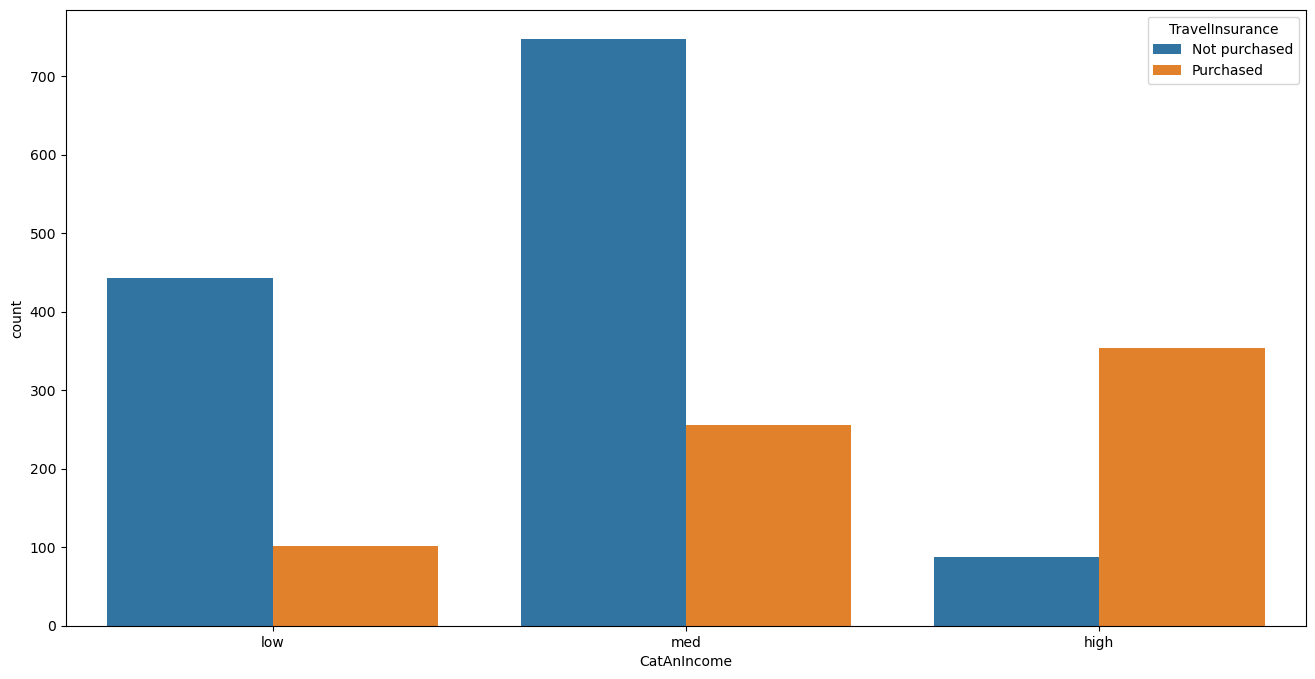

In [116]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x=df['CatAnIncome'], hue=df['TravelInsurance'])

Customers who have high income tend to buy Travel Insurance

In [119]:
# Check Correlation
corr = df['cats'].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues')

KeyError: 'cats'

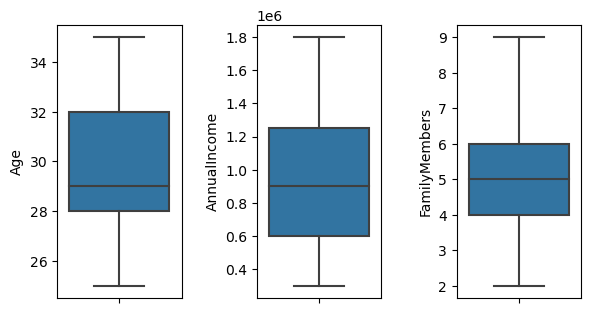

In [98]:
# Check Outlier
plt.figure(figsize=(20,12))
for i in range (0, len(nums)):
    plt.subplot(4,10,i+1)
    sns.boxplot(y=df[nums[i]])
plt.tight_layout()

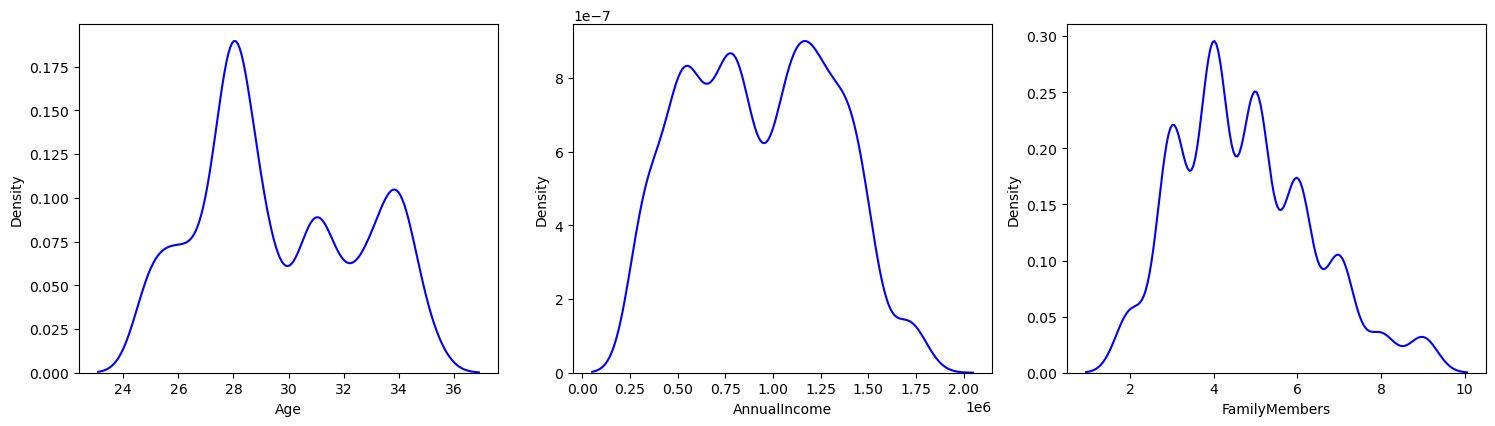

In [99]:
plt.figure(figsize=(20,8))
for i in range(0, len(nums)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=df[nums[i]], color = 'blue')
  plt.tight_layout()

# Feature Engineering

# Missing Values

# Feature Scalling and Transformation

# Modelling

# Saran